In [1]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# URL pro raw csv que ta no git
url = './[better-code] myo-raw/datasets/myo-movimento-david-ruim-2019-06-06 11:46:06-.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset = pd.read_csv(url)
#Normaliza e transforma em numpy array
Normalized_Data = preprocessing.normalize(Dataset)

print("Original Dataset")
print (Dataset.head())


print("\n\nNormalized Dataset")
print (Normalized_Data)


# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
Scaled_Data = scaler.fit_transform(Dataset)
Scaled_Data = pd.DataFrame(Scaled_Data)
  
print("\n\nScaled Dataset")
print (Scaled_Data.head)

Original Dataset
   Unnamed: 0  Gyro 0  Gyro 1  Gyro 2  Label  Orientation 0  Orientation 1  \
0           0    -2.0   -50.0   -20.0    0.0         7723.0         1572.0   
1           1    -2.0   -50.0   -20.0    0.0         7723.0         1572.0   
2           2    -2.0   -50.0   -20.0    0.0         7723.0         1572.0   
3           3  -103.0   -49.0   -26.0    0.0         7713.0         1563.0   
4           4  -103.0   -49.0   -26.0    0.0         7713.0         1563.0   

   Orientation 2  Orientation 3  Sensor 0  Sensor 1  Sensor 2  Sensor 3  \
0       -10926.0        -9325.0      -5.0      -3.0       1.0      -3.0   
1       -10926.0        -9325.0       0.0      -3.0      -3.0       0.0   
2       -10926.0        -9325.0      -4.0      -5.0     -15.0      -3.0   
3       -10923.0        -9338.0      -4.0      -5.0     -15.0      -3.0   
4       -10923.0        -9338.0      -3.0      -6.0     -13.0      -5.0   

   Sensor 4  Sensor 5  Sensor 6  Sensor 7  Timestamp  
0       

In [3]:
Dataset["Variance"] = Dataset.var(axis=1)
Dataset["Mean"] = Dataset.mean(axis=1)
print("Mean")
print(Dataset.get("Variance").head(10))

print("\nVariance")
print(Dataset.get("Mean").head(10))


Mean
0    1.539277e+07
1    1.539291e+07
2    1.539192e+07
3    1.538249e+07
4    1.538227e+07
5    1.538101e+07
6    1.538269e+07
7    1.538343e+07
8    1.538623e+07
9    1.538544e+07
Name: Variance, dtype: float64

Variance
0    809564.586696
1    809572.278607
2    809519.068157
3    809015.711132
4    809003.942586
5    808936.127180
6    809025.465452
7    809064.916926
8    809215.855894
9    809173.423613
Name: Mean, dtype: float64


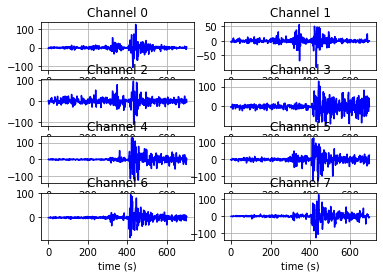

In [42]:
ax = np.linspace(0, 700, 700, endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

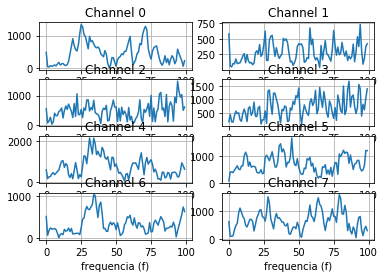

In [43]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("frequencia (f)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(abs(np.fft.rfft(l)[:100]))
    plt.grid()

plt.draw()
plt.show()

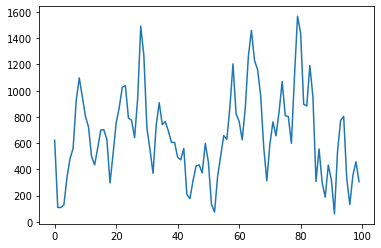

In [44]:
plt.plot(abs(np.fft.rfft(l)[:100]))

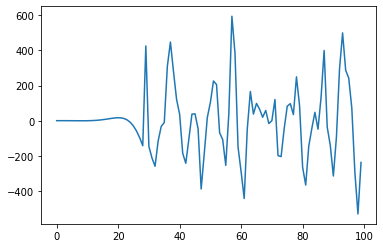

In [56]:
# https://fiiir.com/

s = abs(np.fft.rfft(l))


# Configuration.
fS = 200  # Sampling rate.
fH = 10  # Cutoff frequency.
N = 59  # Filter length, must be odd.

# Compute sinc filter.
h = np.sinc(2 * fH / fS * (np.arange(N) - (N - 1) / 2))

# Apply window.
h *= np.blackman(N)

# Normalize to get unity gain.
h /= np.sum(h)

# Create a high-pass filter from the low-pass filter through spectral inversion.
h = -h
h[(N - 1) // 2] += 1
s = np.convolve(s, h)

plt.plot(s[:100])

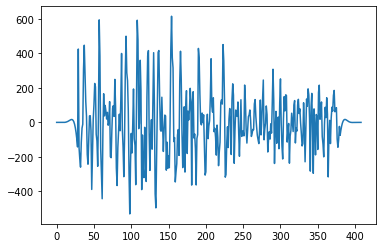

In [58]:
rec = np.fft.irfft(s[:100])
plt.plot(s)

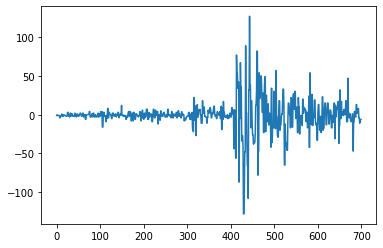

In [59]:
plt.plot(l)

(array([[4.44262266e-01, 4.24196096e-01, 2.07245507e+00, 4.57540322e-01],
        [2.40422725e-01, 2.28414620e-01, 4.76136334e+00, 7.08336910e-01],
        [8.76924996e-02, 2.72190238e-01, 1.05268194e+01, 1.44752430e+01],
        [2.00539372e-01, 3.01051269e-01, 8.29647476e+00, 4.30430857e+01],
        [1.67985135e-01, 2.12897366e-01, 1.71649739e+01, 1.31048221e+01],
        [8.55871495e-02, 8.78878774e-02, 1.76904982e+01, 2.22083601e+00],
        [4.28519218e-02, 1.05114023e-01, 1.50020351e+01, 1.58841365e+01],
        [3.90927510e-02, 1.15014609e-01, 1.16264118e+01, 2.44613703e+01],
        [6.61013535e-02, 1.14162418e-01, 2.58172081e+01, 3.30664182e+01],
        [1.71629281e-01, 5.45986434e-02, 3.82590746e+01, 1.86596346e+00],
        [2.79383267e-01, 1.56087598e-01, 3.26962019e+01, 3.14130057e+01],
        [4.26068028e-01, 1.48357488e-01, 3.00501266e+01, 2.06353308e+01],
        [2.43932037e-01, 7.57763820e-03, 2.47089215e+01, 4.56257201e+00],
        [1.46890207e-02, 3.41442182e-0

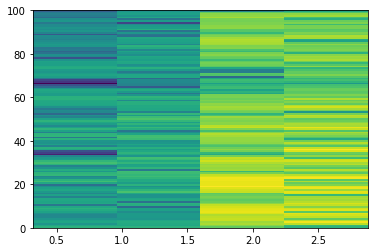

In [60]:
plt.specgram(l,Fs=200)

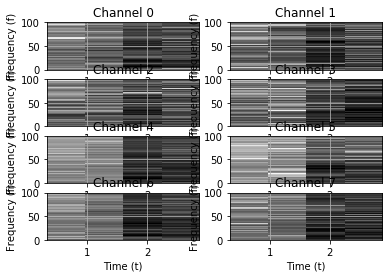

In [33]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("Time (t)")
    plt.ylabel("Frequency (f)")

    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.specgram(l,Fs=200,cmap=plt.cm.gray_r)
    plt.grid()

plt.draw()
plt.show()

## Feature selection
https://machinelearningmastery.com/feature-selection-machine-learning-python/

PCA - Principal Component Analysis

In [34]:
from sklearn.decomposition import PCA
X = Dataset.values[:][1:]
pca = PCA(n_components=3)
fit = pca.fit(X)
print("Explained Variance: ", fit.explained_variance_ratio_)
# print(fit.components_)

Explained Variance:  [9.99985664e-01 9.20668873e-06 2.67016732e-06]


A taxa de variancia vai diminuindo a medida que os elementos vão perdendo a importância. porém isso pode ser causado por nao termos o sinal anotado, assim nao podendo separar os grupos

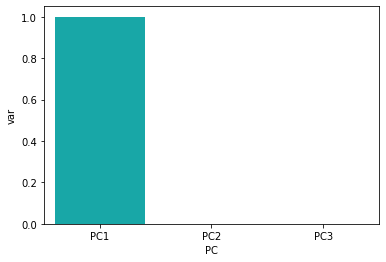

In [35]:
import seaborn as sns
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", data=df, color="c");

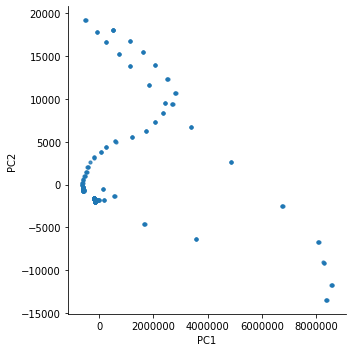

In [36]:
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3'])
pc_df.head()
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 10}) # specify the point size

## Feature extraction
https://librosa.github.io/librosa/feature.html

Librosa - é uma biblioteca para se trabalhar com audio, mas o nosso sinal pode ser trabalhado de forma análoga 

In [68]:
np.sign(0)

0